<a href="https://colab.research.google.com/github/wanlichen2024/Big-Data-Analytics/blob/main/MapReduce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from pyspark import SparkContext, SparkConf

# Create a SparkContext
conf = SparkConf().setAppName("ElectricityMapReduceJob")
sc = SparkContext(conf=conf)

In [3]:
# load this data into an RDD and preprocess it.
# Load the data into an RDD
lines = sc.textFile("/content/drive/MyDrive/cleaned_data.csv")

# Split each line into fields and filter out header if necessary
header = lines.first()
data = lines.filter(lambda line: line != header).map(lambda line: line.split(","))

# preview 5 rows
for row in data.take(5):
    print(row)

['2009-01-01 00:30:00', '0:00:00', '37910', '38704', '33939', '54', '1403', '0', '0', '0', '33', '2002', '0', '0', '-161', '0', '0', '1']
['2009-01-01 01:00:00', '0:30:00', '38047', '38964', '34072', '53', '1403', '0', '0', '0', '157', '2002', '0', '0', '-160', '0', '0', '1']
['2009-01-01 01:30:00', '1:00:00', '37380', '38651', '33615', '53', '1403', '0', '0', '0', '511', '2002', '0', '0', '-160', '0', '0', '1']
['2009-01-01 02:00:00', '1:30:00', '36426', '37775', '32526', '50', '1403', '0', '0', '0', '589', '1772', '0', '0', '-160', '0', '0', '1']
['2009-01-01 02:30:00', '2:00:00', '35687', '37298', '31877', '50', '1403', '0', '0', '0', '851', '1753', '0', '0', '-160', '0', '0', '1']


In [4]:
# extract colunm 0 and colunm 2 which are timestamp and national demand
processed_data = data.map(lambda x: (x[0], float(x[2])))
# extract monthly information
monthly_data = processed_data.map(lambda x: (x[0][:7], x[1]))
# caculate the sum of every month
monthly_demand = monthly_data.reduceByKey(lambda x, y: x + y)
# check result
for month, demand in monthly_demand.collect():
    print(f"Month: {month}, Total National Demand: {demand}")



Month: 2009-02, Total National Demand: 56075878.0
Month: 2009-03, Total National Demand: 56520691.0
Month: 2009-04, Total National Demand: 49313044.0
Month: 2009-05, Total National Demand: 48440442.0
Month: 2009-06, Total National Demand: 46906673.0
Month: 2009-09, Total National Demand: 47438781.0
Month: 2009-11, Total National Demand: 54087810.0
Month: 2009-12, Total National Demand: 60550119.0
Month: 2010-02, Total National Demand: 56812161.0
Month: 2010-07, Total National Demand: 41085365.0
Month: 2011-03, Total National Demand: 57311034.0
Month: 2011-04, Total National Demand: 47347221.0
Month: 2011-06, Total National Demand: 46441741.0
Month: 2011-10, Total National Demand: 50418992.0
Month: 2011-12, Total National Demand: 57183728.0
Month: 2012-01, Total National Demand: 58524135.0
Month: 2012-03, Total National Demand: 54163325.0
Month: 2012-05, Total National Demand: 45041007.0
Month: 2012-08, Total National Demand: 46156699.0
Month: 2012-10, Total National Demand: 50667071.0


In [5]:
# sum of the count of each month
monthly_aggregate = monthly_data.combineByKey(
    lambda value: (value, 1),
    lambda acc, value: (acc[0] + value, acc[1] + 1),
    lambda acc1, acc2: (acc1[0] + acc2[0], acc1[1] + acc2[1])
)

# monthly average
monthly_average = monthly_aggregate.mapValues(lambda x: x[0] / x[1])

# reslut
for month, avg_demand in monthly_average.collect():
    print(f"Month: {month}, Average National Demand: {avg_demand}")

Month: 2009-02, Average National Demand: 41723.12351190476
Month: 2009-03, Average National Demand: 38035.45827725437
Month: 2009-04, Average National Demand: 34245.169444444444
Month: 2009-05, Average National Demand: 32554.060483870966
Month: 2009-06, Average National Demand: 32574.078472222223
Month: 2009-09, Average National Demand: 32943.597916666666
Month: 2009-11, Average National Demand: 37560.979166666664
Month: 2009-12, Average National Demand: 40692.284274193546
Month: 2010-02, Average National Demand: 42270.953125
Month: 2010-07, Average National Demand: 31701.67052469136
Month: 2011-03, Average National Demand: 38567.31763122477
Month: 2011-04, Average National Demand: 32880.01458333333
Month: 2011-06, Average National Demand: 32251.20902777778
Month: 2011-10, Average National Demand: 33883.7311827957
Month: 2011-12, Average National Demand: 38429.92473118279
Month: 2012-01, Average National Demand: 39330.73588709677
Month: 2012-03, Average National Demand: 36449.074697173

In [6]:
# setting threshold
threshold = 1e7

# high demand month
high_demand_months = monthly_demand.filter(lambda x: x[1] > threshold)

In [7]:
# sum of each month demand
for month, demand in monthly_demand.collect():
    print(f"Month: {month}, Total Demand: {demand}")

Month: 2009-02, Total Demand: 56075878.0
Month: 2009-03, Total Demand: 56520691.0
Month: 2009-04, Total Demand: 49313044.0
Month: 2009-05, Total Demand: 48440442.0
Month: 2009-06, Total Demand: 46906673.0
Month: 2009-09, Total Demand: 47438781.0
Month: 2009-11, Total Demand: 54087810.0
Month: 2009-12, Total Demand: 60550119.0
Month: 2010-02, Total Demand: 56812161.0
Month: 2010-07, Total Demand: 41085365.0
Month: 2011-03, Total Demand: 57311034.0
Month: 2011-04, Total Demand: 47347221.0
Month: 2011-06, Total Demand: 46441741.0
Month: 2011-10, Total Demand: 50418992.0
Month: 2011-12, Total Demand: 57183728.0
Month: 2012-01, Total Demand: 58524135.0
Month: 2012-03, Total Demand: 54163325.0
Month: 2012-05, Total Demand: 45041007.0
Month: 2012-08, Total Demand: 46156699.0
Month: 2012-10, Total Demand: 50667071.0
Month: 2013-04, Total Demand: 50845211.0
Month: 2013-07, Total Demand: 46180434.0
Month: 2013-08, Total Demand: 44916158.0
Month: 2013-09, Total Demand: 46113675.0
Month: 2013-11, 

In [8]:
# 保存到本地
monthly_demand.saveAsTextFile("/path/to/output/monthly_demand")

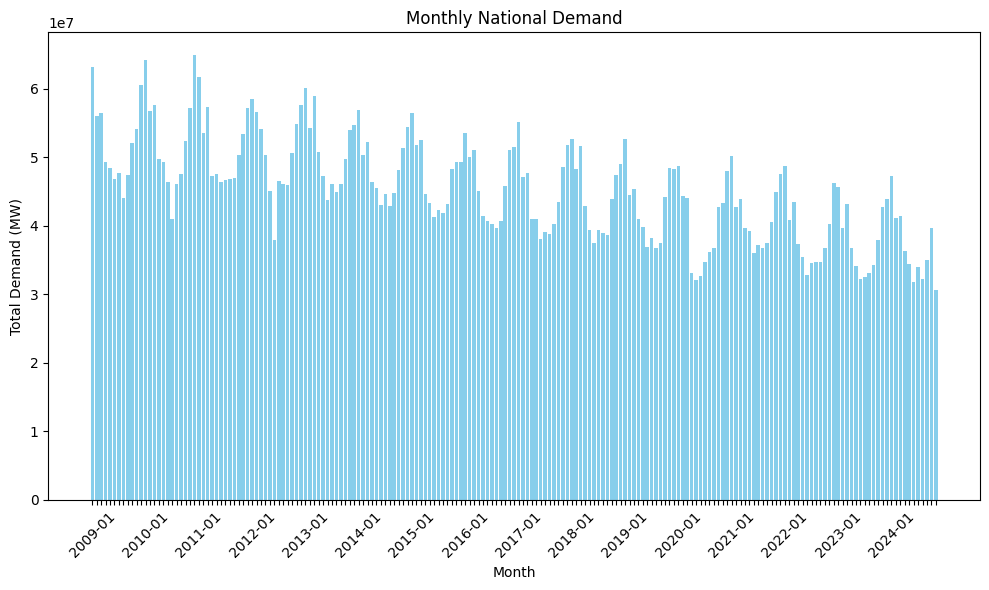

In [9]:
import matplotlib.pyplot as plt
import pandas as pd

# 将 RDD 转为 Pandas DataFrame
monthly_demand_df = pd.DataFrame(monthly_demand.collect(), columns=["Month", "Total Demand"])

# 排序数据（按月份）
monthly_demand_df = monthly_demand_df.sort_values("Month")

# 提取年份标注（仅标注每年的第一个月份）
xticks = [
    month if month.endswith("-01") else "" for month in monthly_demand_df["Month"]
]

# 绘制柱状图
plt.figure(figsize=(10, 6))
plt.bar(monthly_demand_df["Month"], monthly_demand_df["Total Demand"], color="skyblue")
plt.title("Monthly National Demand")
plt.xlabel("Month")
plt.ylabel("Total Demand (MW)")
plt.xticks(range(len(monthly_demand_df["Month"])), xticks, rotation=45)  # 设置刻度和标签
plt.tight_layout()
plt.show()

# 统计计算（Statistical Computation）：

In [10]:
# 计算每个月的总需求和记录条数
monthly_aggregate = monthly_data.combineByKey(
    lambda value: (value, 1),  # 初始化 (总和, 计数)
    lambda acc, value: (acc[0] + value, acc[1] + 1),  # 聚合总和和计数
    lambda acc1, acc2: (acc1[0] + acc2[0], acc1[1] + acc2[1])  # 合并分区
)

# 计算每个月的平均值、最大值、最小值
monthly_stats = monthly_aggregate.mapValues(lambda x: {
    "avg": x[0] / x[1],  # 平均值
    "count": x[1]        # 总记录数
})

# 查看结果
for month, stats in monthly_stats.collect():
    print(f"Month: {month}, Avg Demand: {stats['avg']}, Count: {stats['count']}")

Month: 2009-02, Avg Demand: 41723.12351190476, Count: 1344
Month: 2009-03, Avg Demand: 38035.45827725437, Count: 1486
Month: 2009-04, Avg Demand: 34245.169444444444, Count: 1440
Month: 2009-05, Avg Demand: 32554.060483870966, Count: 1488
Month: 2009-06, Avg Demand: 32574.078472222223, Count: 1440
Month: 2009-09, Avg Demand: 32943.597916666666, Count: 1440
Month: 2009-11, Avg Demand: 37560.979166666664, Count: 1440
Month: 2009-12, Avg Demand: 40692.284274193546, Count: 1488
Month: 2010-02, Avg Demand: 42270.953125, Count: 1344
Month: 2010-07, Avg Demand: 31701.67052469136, Count: 1296
Month: 2011-03, Avg Demand: 38567.31763122477, Count: 1486
Month: 2011-04, Avg Demand: 32880.01458333333, Count: 1440
Month: 2011-06, Avg Demand: 32251.20902777778, Count: 1440
Month: 2011-10, Avg Demand: 33883.7311827957, Count: 1488
Month: 2011-12, Avg Demand: 38429.92473118279, Count: 1488
Month: 2012-01, Avg Demand: 39330.73588709677, Count: 1488
Month: 2012-03, Avg Demand: 36449.07469717362, Count: 14

In [11]:
total_demand = processed_data.map(lambda x: x[1]).sum()
total_count = processed_data.count()
overall_avg = total_demand / total_count
print(f"Overall Average Demand: {overall_avg}")

Overall Average Demand: 31187.33475741434
